# A comparision between files error corrected with MultiCAL/measlp/calrep and using PNAGrabber/MUF
1. Import the 2 port DUT files in .asc format (calrep)
2. Import the nominal solutions from the MUF format
3. Transform all to s2p format and plot comparision

In [1]:
# import required libraries
from pyMeasure import *
import os

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [2]:
# first get the appropriate files
# This constant might need to change
JUPYTER_DIRECTORY=r"C:\Users\sandersa\PyCharm Projects\Jupyter-Notebooks"
CALREP_DIRECTORY=os.path.join(JUPYTER_DIRECTORY,r"Calrep_MUF_Comparison_Files\Calrep_results")
N203_DIRECTORY=os.path.join(CALREP_DIRECTORY,'N203')
MUF_DIRECTORY=os.path.join(JUPYTER_DIRECTORY,r"Calrep_MUF_Comparison_Files\MUF_results\DUTs")


## N203 Comparision
N203 is a two-port round robin device. The files were seperated into forward and reverse measurements.

In [3]:
# Calrep files
N203_foward_file_path=os.path.join(N203_DIRECTORY,"N203FW.asc")
N203_reverse_file_path=os.path.join(N203_DIRECTORY,"N203RV.asc")
#print JUPYTER_DIRECTORY
N203_foward=TwoPortCalrepModel(N203_foward_file_path)
N203_reverse=TwoPortCalrepModel(N203_reverse_file_path)



<IPython.core.display.Javascript object>


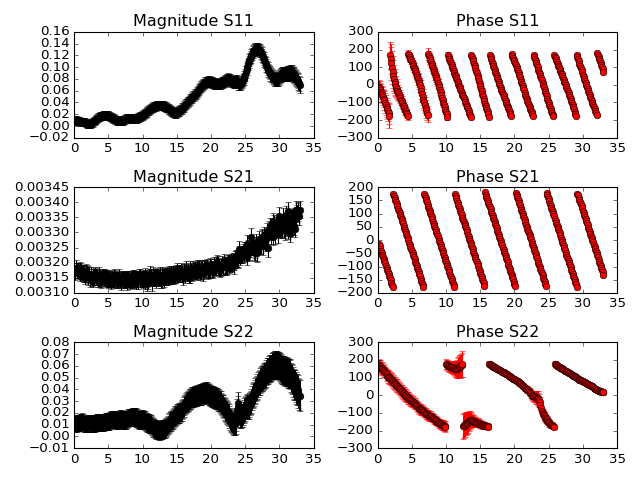

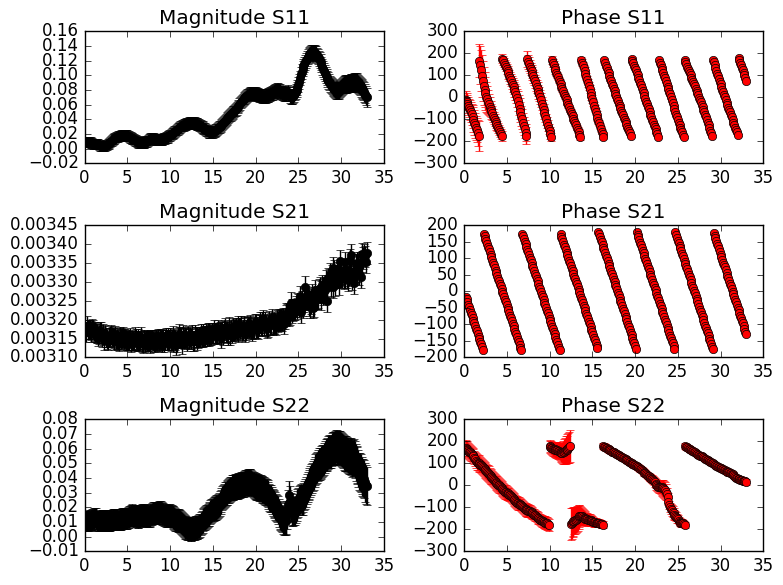

In [4]:
%matplotlib notebook
N203_foward.show()

<IPython.core.display.Javascript object>


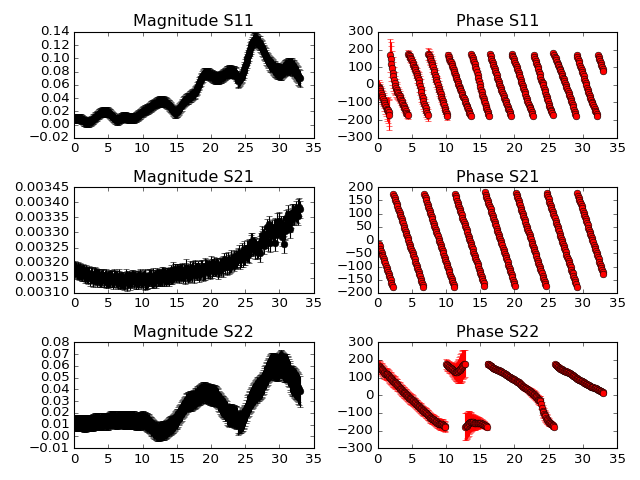

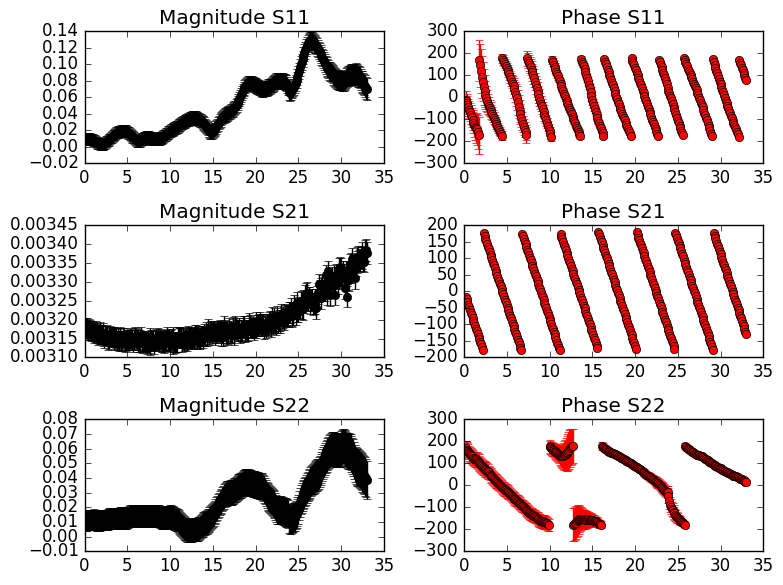

In [5]:
N203_reverse.show()

<IPython.core.display.Javascript object>


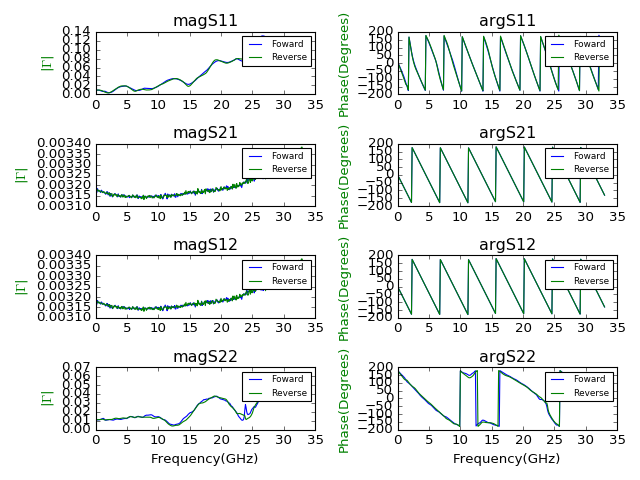

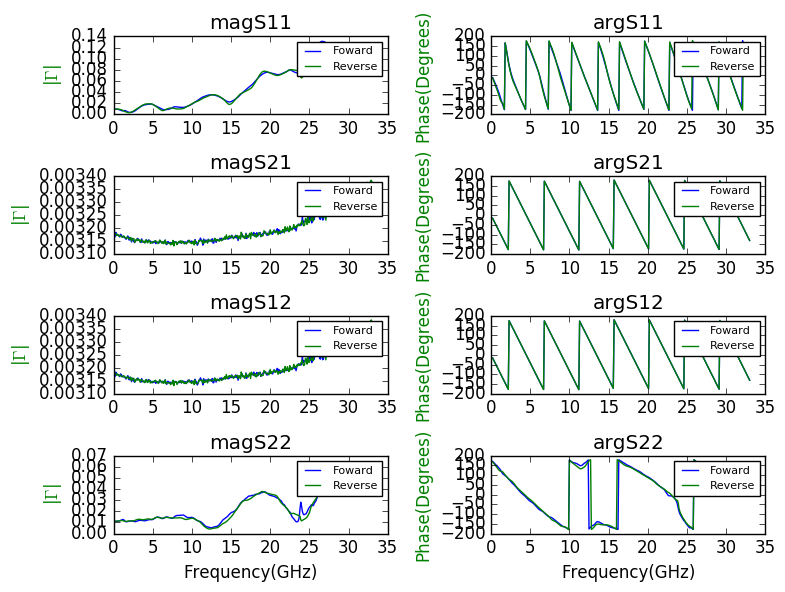

In [6]:
# Convert these to s2p
calrep_s2p_N203_fw=TwoPortCalrepModel_to_S2PV1(N203_foward)
calrep_s2p_N203_rv=TwoPortCalrepModel_to_S2PV1(N203_reverse)

# show the comparison
compare_s2p_plots([calrep_s2p_N203_fw,calrep_s2p_N203_rv], labels=["Foward","Reverse"])

<IPython.core.display.Javascript object>


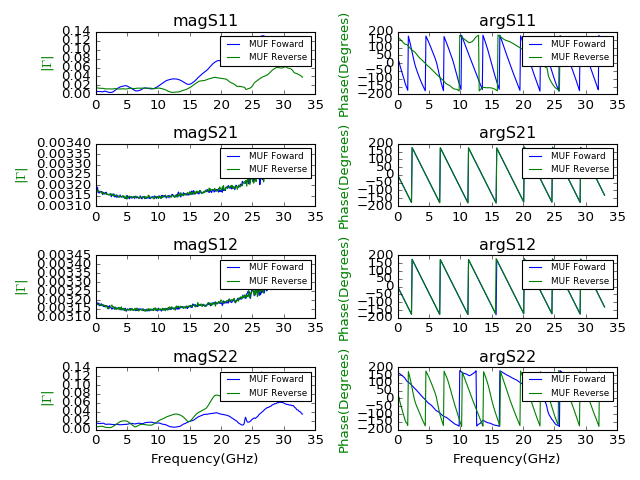

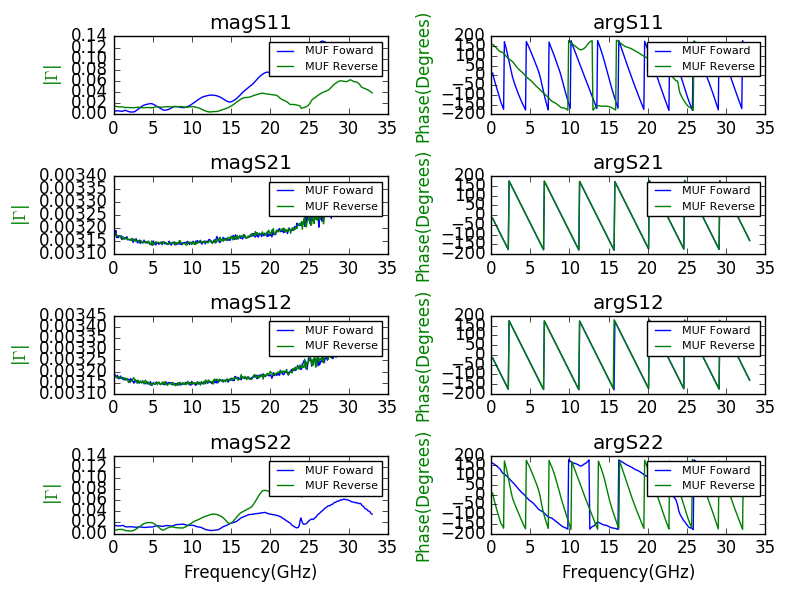

In [7]:
# Now import the muf ones 
MUF_foward_file_path=os.path.join(MUF_DIRECTORY,"N203FW_Support/N203FW_0.s2p")
MUF_reverse_file_path=os.path.join(MUF_DIRECTORY,"N203RV_Support/N203RV_0.s2p")
N203_MUF_fw=S2PV1(MUF_foward_file_path)
N203_MUF_rv=S2PV1(MUF_reverse_file_path)
# Show them together
compare_s2p_plots([N203_MUF_fw,N203_MUF_rv], labels=["MUF Foward","MUF Reverse"])

<IPython.core.display.Javascript object>


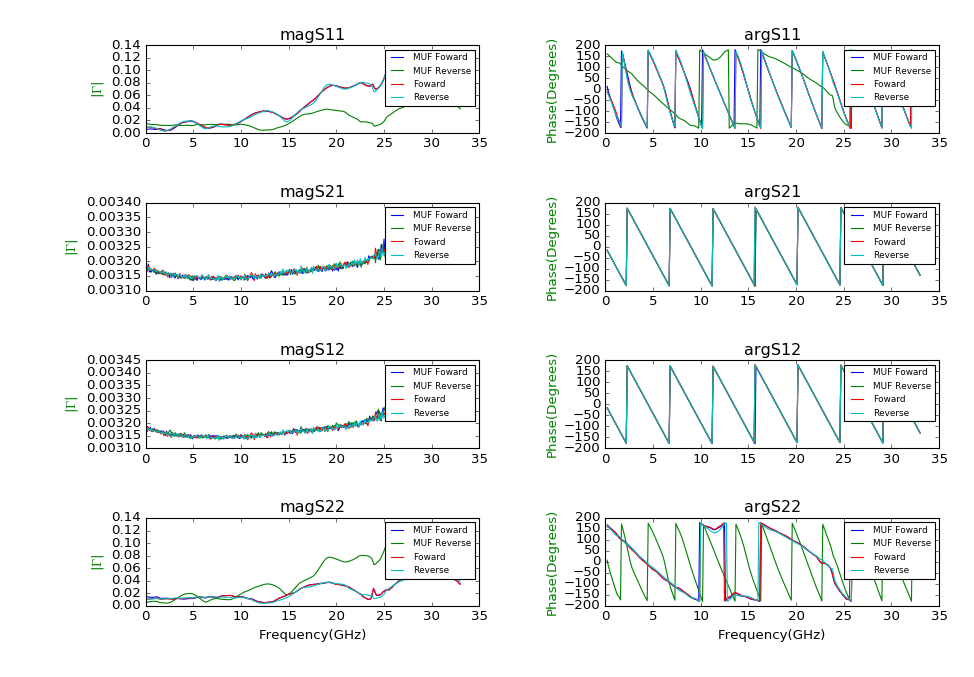

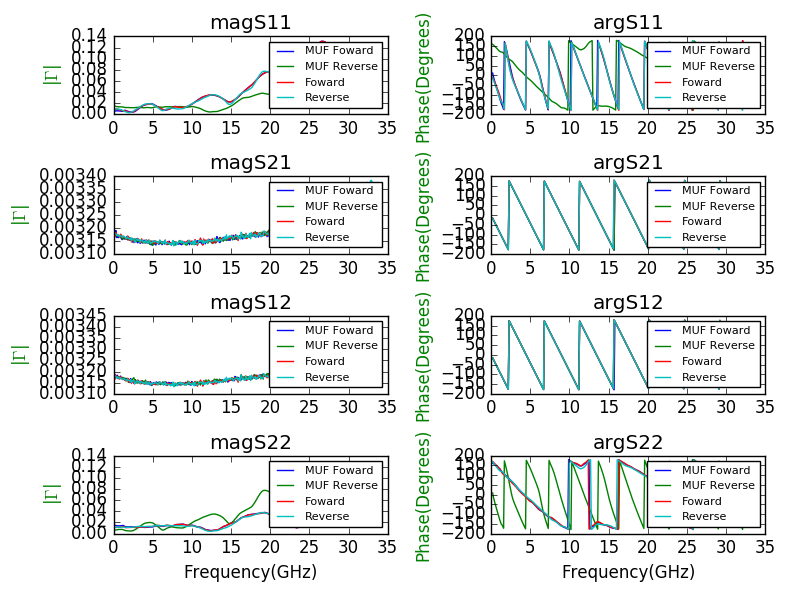

In [8]:
# Now show them all together
compare_s2p_plots([N203_MUF_fw,N203_MUF_rv]+[calrep_s2p_N203_fw,calrep_s2p_N203_rv],
                 labels=["MUF Foward","MUF Reverse"]+["Foward","Reverse"])